Importing the file of student lifestyle dataset in colab

In [ ]:
 from google.colab import files
uploaded = files.upload()

Saving student_lifestyle_project_dataset.xlsx to student_lifestyle_project_dataset.xlsx


Loading necessary libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Allocating dataset to a variable in python

In [ ]:
stdlif=pd.read_excel('student_lifestyle_project_dataset.xlsx')

To understand statistical properties of the features of the dataset

In [ ]:
stdlif.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [ ]:
stdlif.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level,Stress_Level_Num
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate,1
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low,0
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low,0
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate,1
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High,2


In [ ]:
stdlif.value_counts('Stress_Level')

,count
Stress_Level,
High,1029
Moderate,674
Low,297


<Axes: xlabel='Stress_Level'>

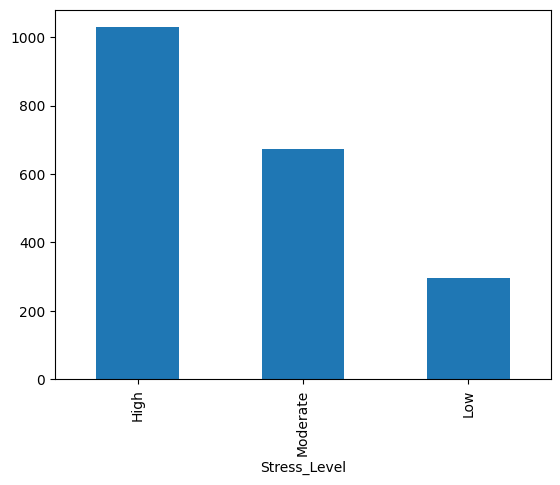

In [ ]:
stdlif.value_counts('Stress_Level').plot(kind='bar')

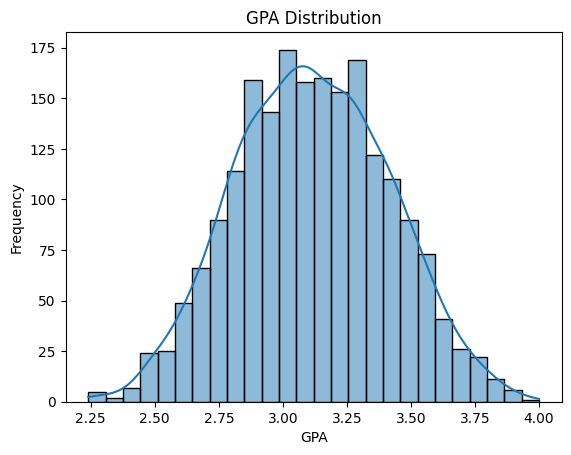

In [ ]:
stdlif.value_counts('GPA')
sns.histplot(stdlif['GPA'],kde=True)
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('GPA Distribution')
plt.show()

Cleaning the data

In [ ]:
stdlif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


No null values were present but clearly, Student_ID column was of no significance to the project so it will be dropped

In [ ]:
stdlif.drop(columns=['Student_ID'],inplace=True)

Plotting pair-wise plots to understand the effect of factors on each other

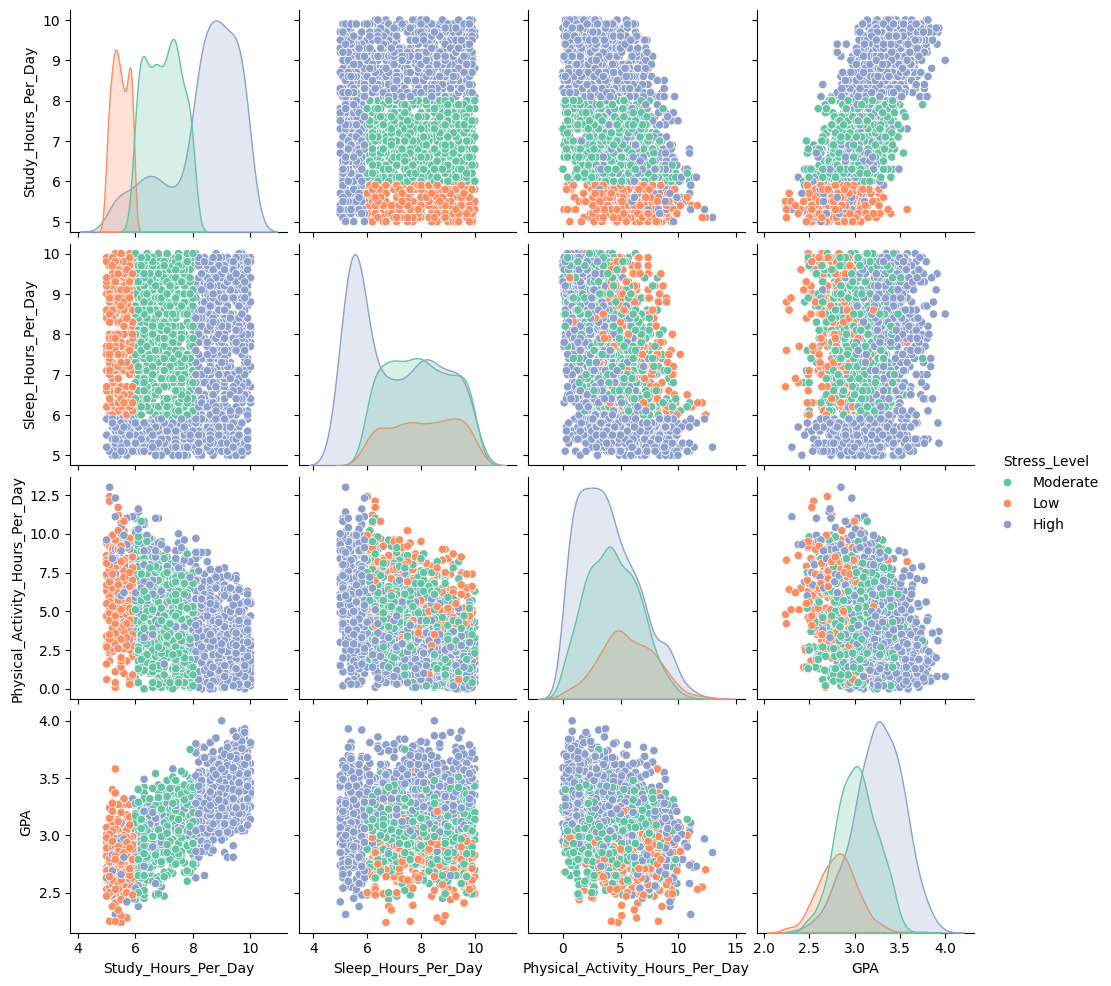

In [ ]:
sns.pairplot(stdlif[["Study_Hours_Per_Day", "Sleep_Hours_Per_Day",
                     "Physical_Activity_Hours_Per_Day", "GPA", "Stress_Level"]],
             hue="Stress_Level", palette="Set2")


Interpretation-

Studying correlation between different features

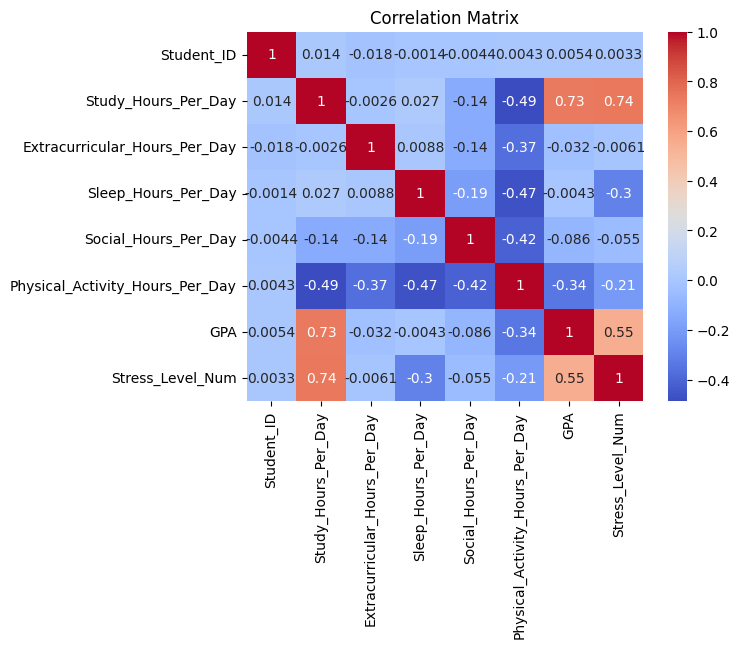

In [ ]:
numerical_columns = stdlif.select_dtypes(include=['number']).columns
sns.heatmap(stdlif[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


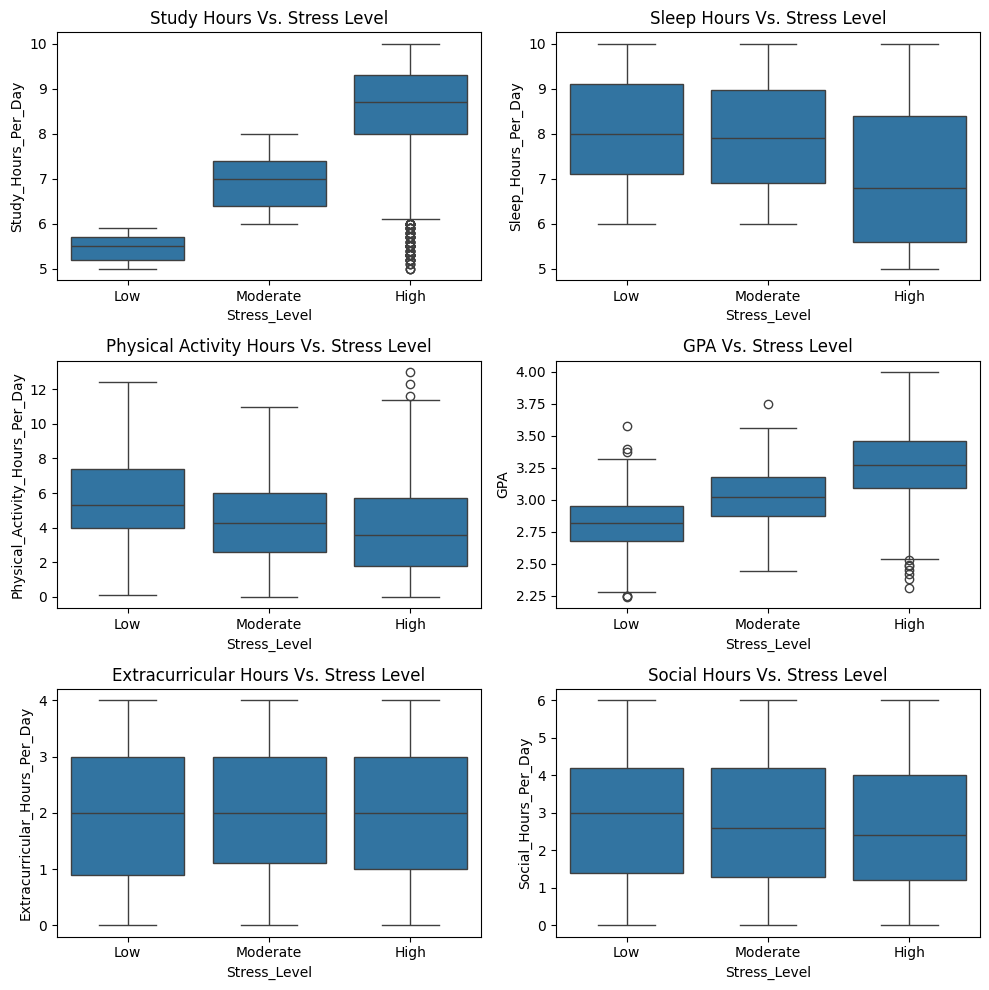

In [ ]:
fig,axes=plt.subplots(3,2,figsize=(10,10))
sns.boxplot(x='Stress_Level',y='Study_Hours_Per_Day',data=stdlif,ax=axes[0,0],order=order)
axes[0,0].set_title('Study Hours Vs. Stress Level')

sns.boxplot(x='Stress_Level',y='Sleep_Hours_Per_Day',data=stdlif,ax=axes[0,1],order=order)
axes[0,1].set_title('Sleep Hours Vs. Stress Level')

sns.boxplot(x='Stress_Level',y='Physical_Activity_Hours_Per_Day',data=stdlif,ax=axes[1,0],order=order)
axes[1,0].set_title('Physical Activity Hours Vs. Stress Level')

sns.boxplot(x='Stress_Level',y='GPA',data=stdlif,ax=axes[1,1],order=order)
axes[1,1].set_title('GPA Vs. Stress Level')

sns.boxplot(x='Stress_Level',y='Extracurricular_Hours_Per_Day',data=stdlif,ax=axes[2,0],order=order)
axes[2,0].set_title('Extracurricular Hours Vs. Stress Level')

sns.boxplot(x='Stress_Level',y='Social_Hours_Per_Day',data=stdlif,ax=axes[2,1],order=order)
axes[2,1].set_title('Social Hours Vs. Stress Level')

plt.tight_layout()
plt.show()

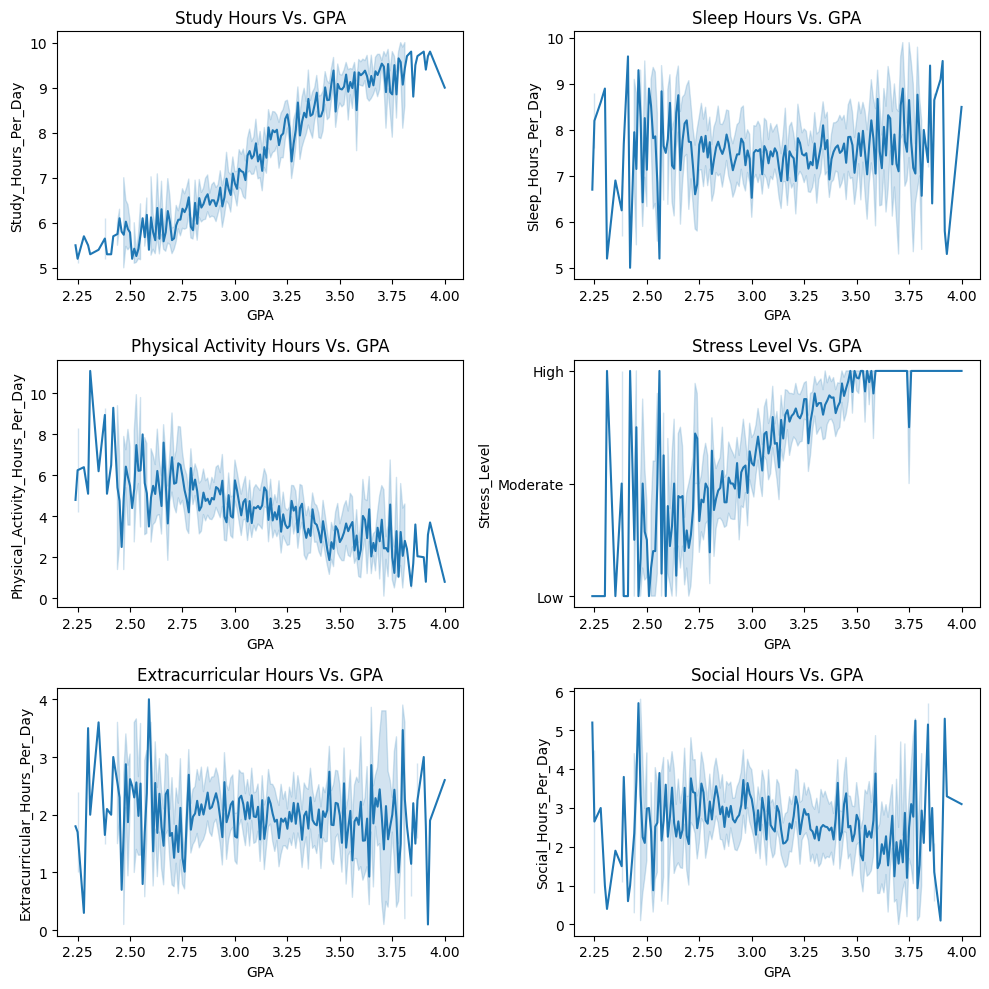

In [ ]:
fig,axes=plt.subplots(3,2,figsize=(10,10))
sns.lineplot(x='GPA',y='Study_Hours_Per_Day',data=stdlif,ax=axes[0,0])
axes[0,0].set_title('Study Hours Vs. GPA')

sns.lineplot(x='GPA',y='Sleep_Hours_Per_Day',data=stdlif,ax=axes[0,1])
axes[0,1].set_title('Sleep Hours Vs. GPA')

sns.lineplot(x='GPA',y='Physical_Activity_Hours_Per_Day',data=stdlif,ax=axes[1,0])
axes[1,0].set_title('Physical Activity Hours Vs. GPA')

stress_order=['High','Moderate','Low']
stdlif['Stress_Level'] = pd.Categorical(stdlif['Stress_Level'], categories=stress_order, ordered=True)

sns.lineplot(x='GPA',y='Stress_Level',data=stdlif,ax=axes[1,1])
axes[1,1].set_title('Stress Level Vs. GPA')

sns.lineplot(x='GPA',y='Extracurricular_Hours_Per_Day',data=stdlif,ax=axes[2,0])
axes[2,0].set_title('Extracurricular Hours Vs. GPA')

sns.lineplot(x='GPA',y='Social_Hours_Per_Day',data=stdlif,ax=axes[2,1])
axes[2,1].set_title('Social Hours Vs. GPA')

plt.tight_layout()
plt.show()

Model fitting

Based on the correlation matrix, Study Hours Per Day and Stress Level showed the strongest positive correlations with GPA (+0.73 and +0.55, respectively). These were selected as primary features for modeling. Other variables like Sleep Hours and Social Hours had negligible correlations and were excluded to avoid noise in the model.

Linear Regression Model using 1 variable for determining GPA

Mean Squared Error: 0.042004317552479034
R-squared: 0.550097874889748
Coefficients: [0.1533673]
Intercept: 1.968796933591775


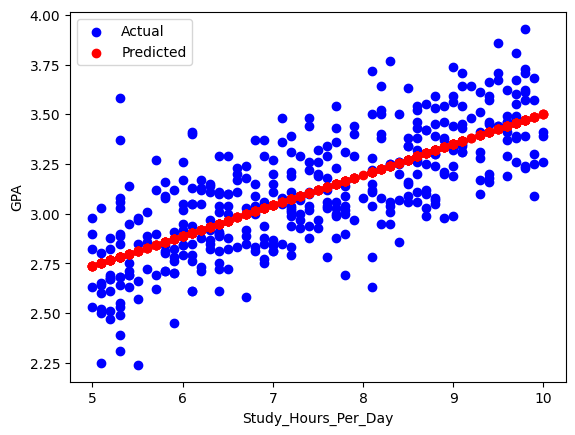

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X=stdlif[['Study_Hours_Per_Day']]
y=stdlif['GPA']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
  plt.scatter(X_test['Study_Hours_Per_Day'], y_test, color='blue',label='Actual')
  plt.scatter(X_test['Study_Hours_Per_Day'], y_pred, color='red' ,label='Predicted')
  plt.xlabel('Study_Hours_Per_Day')
  plt.ylabel('GPA')
  plt.legend()
  plt.show()

Linear Regression Model using multiple variables for determining GPA

Mean Squared Error: 0.0418547661846398
R-squared: 0.5516996978004512
Coefficients: [ 0.15276141 -0.00276648  0.00152915  0.00284995]
Intercept: 1.9860419638424285


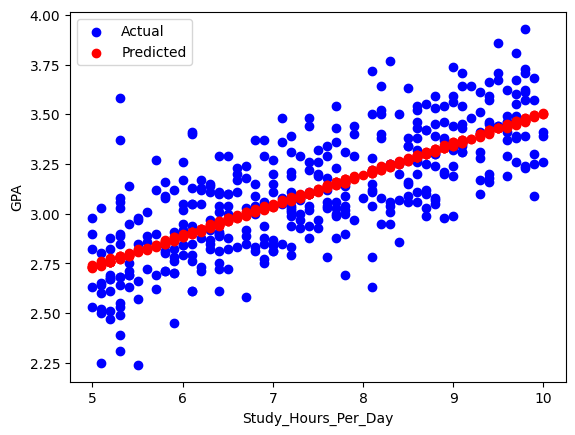

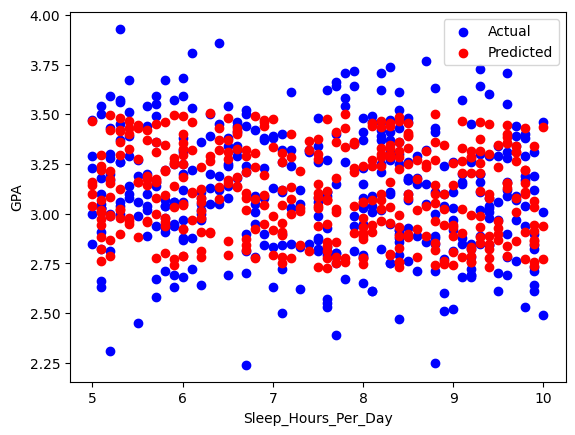

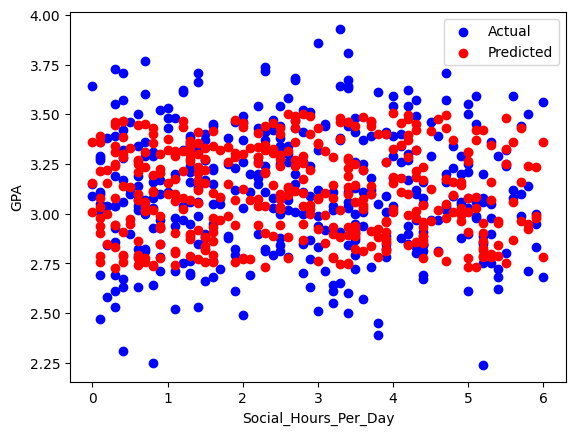

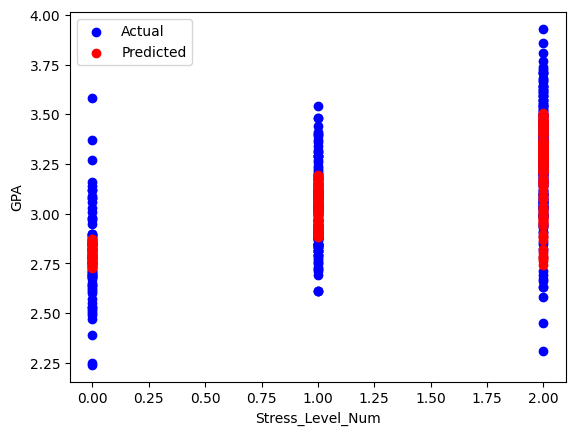

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
stress_map = {'Low': 0, 'Moderate': 1, 'High': 2}
stdlif['Stress_Level_Num'] = stdlif['Stress_Level'].map(stress_map)

X=stdlif[['Study_Hours_Per_Day','Sleep_Hours_Per_Day','Social_Hours_Per_Day','Stress_Level_Num']]
y=stdlif['GPA']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

for feature in X.columns:
  plt.scatter(X_test[feature], y_test, color='blue',label='Actual')
  plt.scatter(X_test[feature], y_pred, color='red' ,label='Predicted')
  plt.xlabel(feature)
  plt.ylabel('GPA')
  plt.legend()
  plt.show()

Logistic Regression Model for determining Stress Level

Accuracy: 0.86
Confusion Matrix:
[[186   6  14]
 [  0  63   4]
 [ 27   5  95]]
Classification Report:
              precision    recall  f1-score   support

        High       0.87      0.90      0.89       206
         Low       0.85      0.94      0.89        67
    Moderate       0.84      0.75      0.79       127

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



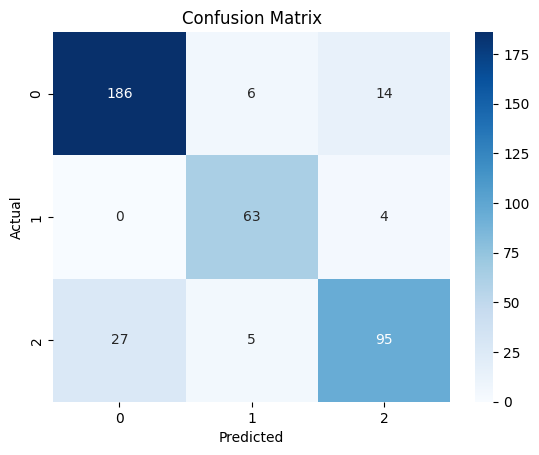

In [ ]:
#logistic regression model
stdlif_encoded = stdlif.copy()
stdlif_encoded['Stress_Level'] = stdlif_encoded['Stress_Level'].map({'Low': 0, 'Moderate': 1, 'High': 2})
order=['Low','Moderate','High']
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = stdlif[['GPA','Study_Hours_Per_Day', 'Sleep_Hours_Per_Day']]
y = stdlif['Stress_Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
